Использовался датасет https://www.kaggle.com/datasets/theovall/phonereviews

In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_eng to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package averaged_perceptron_tagger_rus to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_rus.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_d


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [60]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/phone_calls.csv')
df.head()

Review  Rating
0  3D Touch просто восхитительная вещь! Заряд дер...       5
1  Отключается при температуре близкой к нулю, не...       4
2  В Apple окончательно решили не заморачиваться,...       3
3  Постарался наиболее ёмко и коротко описать все...       4
4  Достойный телефон. Пользоваться одно удовольст...       5

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458433 entries, 0 to 458432
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  457837 non-null  object
 1   Rating  458433 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


In [62]:
df = df.dropna()

In [63]:
df = df.drop_duplicates()

In [64]:
df.Rating.describe()

count    321101.000000
mean          4.006780
std           1.260704
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           9.000000
Name: Rating, dtype: float64

In [65]:
df.loc[df.Rating > 5]

Review  Rating
44444  Очень приятный телефон, постоянно хочется его ...       7
77449  Искал аппарат с большой батареей (много разгов...       9

In [66]:
df.loc[df.Rating < 1]

Review  Rating
69637  Был приверженцем HTC, но что-то тайванские тов...       0

In [67]:
df = df.drop(index = 44444, axis=0)

In [68]:
df = df.drop(index = 77449, axis=0)

In [69]:
df = df.drop(index = 69637, axis=0)

In [70]:
df.Rating.describe()

count    321098.000000
mean          4.006767
std           1.260648
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

In [71]:
df.Review.str.len().describe()

count    321098.000000
mean        426.484534
std         456.544618
min           1.000000
25%         118.000000
50%         267.000000
75%         564.000000
max       31612.000000
Name: Review, dtype: float64

In [73]:
sum(df.Review.str.len() > 2100)

80

In [74]:
df = df.drop(df[df.Review.str.len() > 2100].index)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321018 entries, 0 to 458432
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  321018 non-null  object
 1   Rating  321018 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.3+ MB


Визуализируем разброс оценок

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

fig = px.histogram(df, x='Rating', width=None, height=None)
fig.update_traces(marker_color='orange', marker_line_color='black', marker_line_width=1.5)
fig.update_layout(title_text = 'Review Score')
fig.show()

Визуализируем облако слов для наглядности

In [77]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

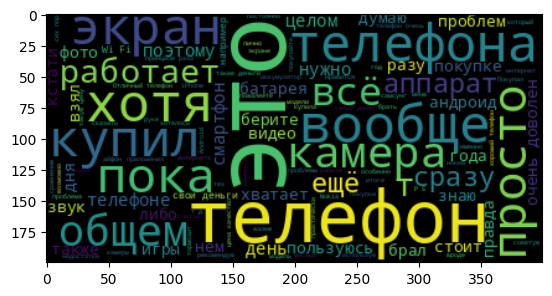

In [78]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

stop_words = set(stopwords.words('russian'))
text = ' '.join(str(review) for review in df['Review'])
wc = WordCloud(stopwords = stop_words).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [79]:
# классифицируем отзывы как положительные и отрицательные
df = df[df['Rating'] != 3]
df['sentiment'] = df['Rating'].apply(lambda rating: +1 if rating >3 else -1)
df.head()

Review  Rating  sentiment
0  3D Touch просто восхитительная вещь! Заряд дер...       5          1
1  Отключается при температуре близкой к нулю, не...       4          1
3  Постарался наиболее ёмко и коротко описать все...       4          1
4  Достойный телефон. Пользоваться одно удовольст...       5          1
5                                       6s gold 64gb       5          1

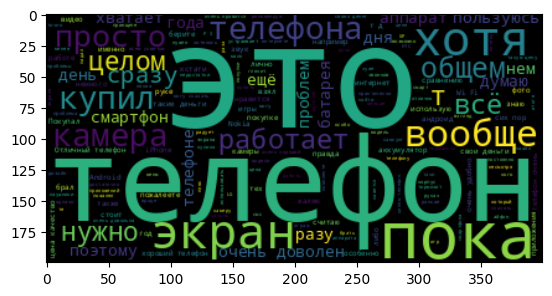

In [80]:
# Worldcloud для позитивных

#stop_words.update([])
text = ' '.join(str(review) for review in df['Review'].loc[df.sentiment == 1])
wc = WordCloud(stopwords = stop_words).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [81]:
df['Review'].loc[df.sentiment == -1]

21        Я не знаю, попался ли мне брак, или Администра...
32        Никаких положительных эмоций этот аппарат у ме...
38        Очень сильно разочарован компанией SONY. Испор...
51                                 Дизайн , конечно, хорош.
53        Хочется взять и вернуть деньги за 60 тыс телеф...
                                ...                        
458367          Не советую брать что либо из фирмы Rover PC
458369    Те, кто называют ровер Р7 подделкой самсунг i7...
458381                   Повезу в гарантийную мастерскую...
458398                Не советую, очень сильно разочарован!
458408                                    Мучаюсь сильно: (
Name: Review, Length: 48491, dtype: object

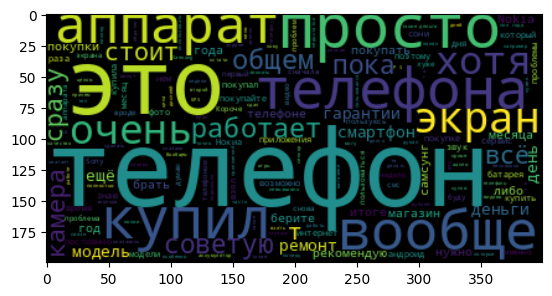

In [82]:
# Worldcloud для негативных

text = ' '.join(str(review) for review in df['Review'].loc[df.sentiment == -1])
wc = WordCloud(stopwords = stop_words).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [83]:
# гистограмма сентимента

df['Sentiment'] = df['sentiment'].replace({-1 : 'negative'})
df['Sentiment'] = df['Sentiment'].replace({1 : 'positive'})
fig = px.histogram(df, x='Sentiment')
fig.update_traces(marker_color='gray', marker_line_color='black', marker_line_width=1.5)
fig.update_layout(title_text = 'Review Sentiment')
fig.show()
df = df.drop(['Sentiment'], axis=1)

Очистим данные: уберём пунктуацию и стоп-слова, приведём к нижнему регистру

In [84]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


def clean_text(review):
  """
  Cleans text: removes punctuation
  review(str): input text
  return: modified initial text
  """

  pattern_rn = re.compile('\\r\\n') #'\r' and '\n'
  pattern_punc = re.compile(r'[^\w\s]')

  review = re.sub(pattern_rn, ' ', review)
  review = re.sub(pattern_punc, ' ', review)
  return review
df['clean_review'] = df['Review'].apply(clean_text)
df.head()

Review  Rating  sentiment  \
0  3D Touch просто восхитительная вещь! Заряд дер...       5          1   
1  Отключается при температуре близкой к нулю, не...       4          1   
3  Постарался наиболее ёмко и коротко описать все...       4          1   
4  Достойный телефон. Пользоваться одно удовольст...       5          1   
5                                       6s gold 64gb       5          1   

                                        clean_review  
0  3D Touch просто восхитительная вещь  Заряд дер...  
1  Отключается при температуре близкой к нулю  не...  
3  Постарался наиболее ёмко и коротко описать все...  
4  Достойный телефон  Пользоваться одно удовольст...  
5                                       6s gold 64gb

In [85]:
# разделим train и test

index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [86]:
# создадим мешок слов
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=True, stop_words=stopwords.words('russian'))
train_matrix = vectorizer.fit_transform(train['clean_review'])
test_matrix = vectorizer.transform(test['clean_review'])

In [87]:
# используем логистическую регрессию
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=300)
x_train = train_matrix
x_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

model.fit(x_train, y_train)

LogisticRegression(max_iter=300)

In [88]:
from sklearn.metrics import classification_report

print(classification_report(model.predict(x_test), y_test))

              precision    recall  f1-score   support

          -1       0.72      0.85      0.78      8669
           1       0.97      0.95      0.96     51527

    accuracy                           0.93     60196
   macro avg       0.85      0.90      0.87     60196
weighted avg       0.94      0.93      0.93     60196

